# Austrailan Open 2019 Final Analysis

Score: [1] Djokovic def. [2] Nadal 6-3 6-2 6-3   
Time of Match: 2 hours y 4 minutes

### Motivation

I am A loyal 8-year Rafaeal Nadal fan. I have always been intersetd to understand the statistics of Nadal matches. The goal of this analysis is to understand the different factors led to the supperising result of the match where Nadal lost to Djokovic in straight 3 sets.

In [63]:
# packages importing
import numpy as np                
import pandas as pd
import altair as alt

## Data Exploration

In [41]:
events =  pd.read_csv('Data/events.csv', index_col = 0)
events.head()

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92
3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44
4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76


The events dataframe contains information about each point hit.

In [14]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 14 columns):
rallyid       865 non-null int64
frameid       865 non-null int64
strokeid      865 non-null int64
hitter        865 non-null object
receiver      845 non-null object
isserve       865 non-null bool
serve         865 non-null object
type          865 non-null object
stroke        865 non-null object
hitter_x      865 non-null float64
hitter_y      865 non-null float64
receiver_x    845 non-null float64
receiver_y    845 non-null float64
time          865 non-null float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 95.5+ KB


In [15]:
events.describe()

,rallyid,frameid,strokeid,hitter_x,hitter_y,receiver_x,receiver_y,time
count,865.000000,865.000000,865.000000,865.000000,865.000000,845.000000,845.000000,865.000000
mean,104.494798,163773.654335,4.708671,4.789121,12.118277,4.758746,12.695479,3715.866173
std,58.939649,54779.332792,3.937678,2.569683,12.670941,2.307859,13.093199,2191.173312
min,1.000000,70877.000000,1.000000,-2.190000,-3.040000,-1.700000,-3.570000,0.000000
25%,54.000000,116235.000000,2.000000,2.900000,-0.390000,3.120000,-0.840000,1814.320000
50%,108.000000,164616.000000,3.000000,4.880000,6.540000,4.810000,17.520000,3749.560000
75%,155.000000,210254.000000,7.000000,6.640000,25.140000,6.280000,25.840000,5575.080000
max,206.000000,256892.000000,22.000000,11.360000,30.370000,10.080000,30.930000,7440.600000


In [19]:
events.isnull().sum()

rallyid        0
frameid        0
strokeid       0
hitter         0
receiver      20
isserve        0
serve          0
type           0
stroke         0
hitter_x       0
hitter_y       0
receiver_x    20
receiver_y    20
time           0
dtype: int64

We have 20 reciever observations that are not available.

In [20]:
points =  pd.read_csv('Data/points.csv', index_col = 0)

In [38]:
points.head()

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"
5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
7,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0"


In [22]:
points.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 205
Data columns (total 11 columns):
rallyid      142 non-null int64
server       142 non-null object
returner     139 non-null object
winner       142 non-null object
reason       142 non-null object
serve        142 non-null object
strokes      142 non-null int64
totaltime    142 non-null float64
x            142 non-null float64
y            142 non-null float64
score        142 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 13.3+ KB


In [23]:
points.describe()

,rallyid,strokes,totaltime,x,y
count,142.000000,142.000000,142.000000,142.000000,142.000000
mean,103.683099,5.485915,4.207887,4.755563,13.597676
std,59.790932,4.338081,4.653339,3.061096,8.715196
min,1.000000,1.000000,-0.520000,-2.110000,-3.570000
25%,51.750000,2.000000,0.800000,1.842500,6.677500
50%,103.500000,4.000000,2.300000,4.760000,12.890000
75%,156.750000,7.000000,6.860000,7.545000,21.525000
max,206.000000,22.000000,21.400000,11.290000,30.230000


In [24]:
points.isnull().sum()

rallyid      0
server       0
returner     3
winner       0
reason       0
serve        0
strokes      0
totaltime    0
x            0
y            0
score        0
dtype: int64

3 missing observations.

In [25]:
rallies =  pd.read_csv('Data/rallies.csv', index_col = 0)

In [26]:
rallies.head()

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


In [27]:
rallies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 10 columns):
rallyid      206 non-null int64
server       206 non-null object
returner     200 non-null object
winner       206 non-null object
reason       206 non-null object
serve        206 non-null object
strokes      206 non-null int64
totaltime    206 non-null float64
x            206 non-null float64
y            206 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 17.7+ KB


In [28]:
rallies.describe()

,rallyid,strokes,totaltime,x,y
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,103.500000,4.199029,2.964078,4.810194,13.326796
std,59.611241,4.218912,4.338453,2.857060,7.636197
min,1.000000,1.000000,-0.520000,-2.110000,-3.570000
25%,52.250000,1.000000,0.000000,2.312500,7.922500
50%,103.500000,2.000000,0.840000,4.805000,12.930000
75%,154.750000,6.000000,3.970000,7.277500,18.265000
max,206.000000,22.000000,21.400000,11.290000,30.230000


In [29]:
rallies.isnull().sum()

rallyid      0
server       0
returner     6
winner       0
reason       0
serve        0
strokes      0
totaltime    0
x            0
y            0
dtype: int64

6 missing observations.

In [30]:
serves =  pd.read_csv('Data/serves.csv', index_col = 0)

In [31]:
serves.head()

,rallyid,server,x,y
0,1,Djokovic,1.86,16.80
1,3,Djokovic,7.05,16.97
2,6,Djokovic,8.04,17.80
3,8,Nadal,4.44,16.24
4,9,Nadal,5.71,16.40


In [32]:
serves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 4 columns):
rallyid    133 non-null int64
server     133 non-null object
x          133 non-null float64
y          133 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


In [33]:
serves.describe()

,rallyid,x,y
count,133.000000,133.00000,133.000000
mean,104.172932,4.75188,12.433233
std,59.851143,2.32375,4.773501
min,1.000000,0.86000,4.260000
25%,54.000000,2.89000,7.050000
50%,103.000000,4.82000,15.880000
75%,157.000000,6.49000,16.640000
max,206.000000,8.69000,17.890000


In [35]:
serves.isnull().sum()

rallyid    0
server     0
x          0
y          0
dtype: int64

## Basic Analysis

* Total points won

In [55]:
points[['winner', 'rallyid']].groupby('winner').count()

,rallyid
winner,
Djokovic,89
Nadal,53


### Total points won for each point type

In [56]:
points

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"
5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
7,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0"
...,...,...,...,...,...,...,...,...,...,...,...
198,199,Nadal,Djokovic,Djokovic,winner,first,6,6.60,2.44,4.71,"6:3 6:2 5:3, 15:15"
200,201,Nadal,Djokovic,Djokovic,net,first,9,9.00,4.26,11.57,"6:3 6:2 5:3, 30:15"
201,202,Nadal,Djokovic,Djokovic,winner,first,4,3.08,1.88,3.36,"6:3 6:2 5:3, 40:15"
203,204,Nadal,Djokovic,Nadal,out,first,12,0.84,8.45,-0.56,"6:3 6:2 5:3, 40:30"


In [83]:
grouped_points = points[['winner', 'reason', 'rallyid']].groupby(by = ['winner', 'reason']).count().reset_index()


In [92]:
grouped_points

,winner,reason,rallyid
0,Djokovic,ace,8
1,Djokovic,double_fault,2
2,Djokovic,net,23
3,Djokovic,out,30
4,Djokovic,winner,26
5,Nadal,ace,3
6,Nadal,net,14
7,Nadal,out,19
8,Nadal,winner,17


In [96]:
points[['winner', 'reason', 'rallyid']].groupby(by = ['winner', 'reason'])['rallyid'].count().reset_index()

,winner,reason,rallyid
0,Djokovic,ace,8
1,Djokovic,double_fault,2
2,Djokovic,net,23
3,Djokovic,out,30
4,Djokovic,winner,26
5,Nadal,ace,3
6,Nadal,net,14
7,Nadal,out,19
8,Nadal,winner,17


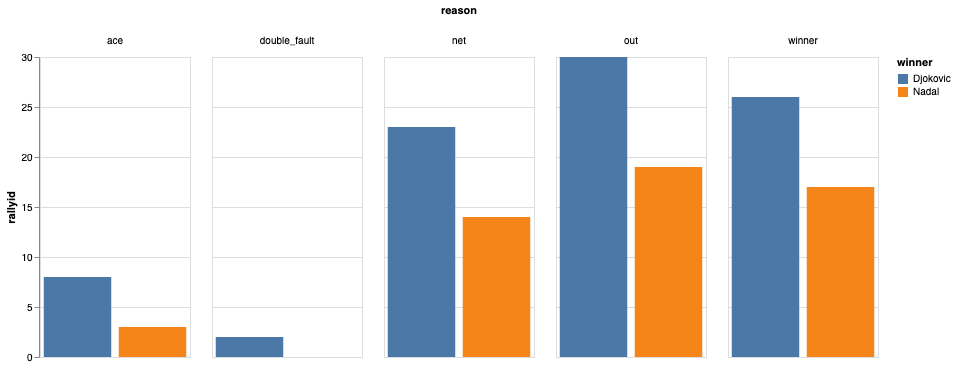

In [106]:
alt.Chart(grouped_points).mark_bar().encode(
    x = alt.X('winner:O', axis = None),
    y = alt.Y('rallyid:Q'),
    color = alt.Color('winner:N', ),
    column = 'reason:N'
).properties(width = 150)